In [66]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Data

In [68]:
# import csv file
df = pd.read_csv('/content/drive/MyDrive/DataCamp/Data/Eid Sales Data.csv', encoding= 'unicode_escape')
df.head(20)

,User ID,Customer name,Product ID,Gender,Age Group,Age,Marital Status,District,Division,Occupation,Product Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,No,Chittagong,Chittagong,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Yes,Khulna,Khulna,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Yes,Dhaka,Dhaka,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,No,Jessore,Khulna,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Yes,Comilla,Chittagong,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,Yes,Bogra,Rajshahi,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,Yes,Dhaka,Dhaka,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,No,Chittagong,Chittagong,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,No,Dhaka,Dhaka,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,Yes,Khulna,Khulna,Media,Auto,4,23799.99,NaN,NaN


In [69]:
df.shape

(11251, 15)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           11251 non-null  int64  
 1   Customer name     11251 non-null  object 
 2   Product ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital Status    11251 non-null  object 
 7   District          11251 non-null  object 
 8   Division          11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


## Data Cleaning

In [71]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [72]:
df.shape

(11251, 13)

In [73]:
#check for null values
df.isnull().sum()

User ID              0
Customer name        0
Product ID           0
Gender               0
Age Group            0
Age                  0
Marital Status       0
District             0
Division             0
Occupation           0
Product Category     0
Orders               0
Amount              12
dtype: int64

In [74]:
missing_amounts = df[df['Amount'].isna()]
missing_amounts

,User ID,Customer name,Product ID,Gender,Age Group,Age,Marital Status,District,Division,Occupation,Product Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,No,Chittagong,Chittagong,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,Yes,Gazipur,Dhaka,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,Yes,Khulna,Khulna,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,Yes,Narayanganj,Dhaka,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,Yes,Narayanganj,Dhaka,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,Yes,Jessore,Khulna,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,No,Comilla,Chittagong,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,Yes,Comilla,Chittagong,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,No,Narayanganj,Dhaka,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,Yes,Gazipur,Dhaka,Hospitality,Food,4,NaN


In [75]:
# finding a series of mean value for Amount column by its District
district_mean=df.groupby('District')['Amount'].transform('mean')
district_mean.head(20)

0      9460.683934
1      9910.168915
2      9966.547325
3     10370.812883
4      9241.409836
5      8163.434211
6      9966.547325
7      9460.683934
8      9966.547325
9      9910.168915
10    10510.706024
11     9910.168915
12     9910.168915
13     9910.168915
14     8796.028230
15     9910.168915
16     9910.168915
17     9910.168915
18     9966.547325
19     9966.547325
Name: Amount, dtype: float64

In [76]:
# dataframe of mean value
dmean=df.groupby('District')['Amount'].mean()
dmean

District
Bagerhat        8597.112561
Bogra           8163.434211
Chittagong      9460.683934
Comilla         9241.409836
Dhaka           9966.547325
Gazipur         8796.028230
Jessore        10370.812883
Khulna          9910.168915
Narail          9211.920000
Narayanganj    10510.706024
Narshingdi      7877.950000
Natore          8265.839827
Pabna           7629.000000
Rajshahi        9336.670354
Sunamganj       7964.357895
Sylhet          9269.025346
Name: Amount, dtype: float64

In [77]:
df['Amount'].fillna(district_mean, inplace=True)

In [78]:
#check for null values again
df.isnull().sum()

User ID             0
Customer name       0
Product ID          0
Gender              0
Age Group           0
Age                 0
Marital Status      0
District            0
Division            0
Occupation          0
Product Category    0
Orders              0
Amount              0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           11251 non-null  int64  
 1   Customer name     11251 non-null  object 
 2   Product ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital Status    11251 non-null  object 
 7   District          11251 non-null  object 
 8   Division          11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [80]:
df.iloc[5:17]

,User ID,Customer name,Product ID,Gender,Age Group,Age,Marital Status,District,Division,Occupation,Product Category,Orders,Amount
5,1000588,Joni,P00057942,M,26-35,28,Yes,Bogra,Rajshahi,Food Processing,Auto,1,23877.000000
6,1001132,Balk,P00018042,F,18-25,25,Yes,Dhaka,Dhaka,Lawyer,Auto,4,23841.000000
7,1002092,Shivangi,P00273442,F,55+,61,No,Chittagong,Chittagong,IT Sector,Auto,1,9460.683934
8,1003224,Kushal,P00205642,M,26-35,35,No,Dhaka,Dhaka,Govt,Auto,2,23809.000000
9,1003650,Ginny,P00031142,F,26-35,26,Yes,Khulna,Khulna,Media,Auto,4,23799.990000
10,1003829,Harshita,P00200842,M,26-35,34,No,Narayanganj,Dhaka,Banking,Auto,1,23770.000000
11,1000214,Kargatis,P00119142,F,18-25,20,No,Khulna,Khulna,Retail,Auto,2,23752.000000
12,1004035,Elijah,P00080342,F,18-25,20,Yes,Khulna,Khulna,IT Sector,Auto,2,23730.000000
13,1001680,Vasudev,P00324942,M,26-35,26,Yes,Khulna,Khulna,Automobile,Auto,4,23718.000000
14,1003858,Cano,P00293742,M,46-50,46,Yes,Gazipur,Dhaka,Hospitality,Auto,3,8796.028230


### So, we replace the NaN value with its corresponding District mean value

In [81]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [82]:
df['Amount'].dtypes

dtype('int64')

In [83]:
df.columns

Index(['User ID', 'Customer name', 'Product ID', 'Gender', 'Age Group', 'Age',
       'Marital Status', 'District', 'Division', 'Occupation',
       'Product Category', 'Orders', 'Amount'],
      dtype='object')

In [84]:
#rename column
df.rename(columns= {'Marital Status':'Married'})

,User ID,Customer name,Product ID,Gender,Age Group,Age,Married,District,Division,Occupation,Product Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,No,Chittagong,Chittagong,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Yes,Khulna,Khulna,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Yes,Dhaka,Dhaka,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,No,Jessore,Khulna,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Yes,Comilla,Chittagong,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Yes,Chittagong,Chittagong,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,No,Rajshahi,Rajshahi,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,No,Gazipur,Dhaka,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,No,Jessore,Khulna,Agriculture,Office,3,206


In [85]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User ID,Age,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,2.489290,9453.951204
std,1.716125e+03,12.754122,1.115047,5219.619195
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [86]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.951204
std,12.754122,1.115047,5219.619195
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

In [87]:
# avoid any unwanted warnings
import warnings
warnings.filterwarnings("ignore")

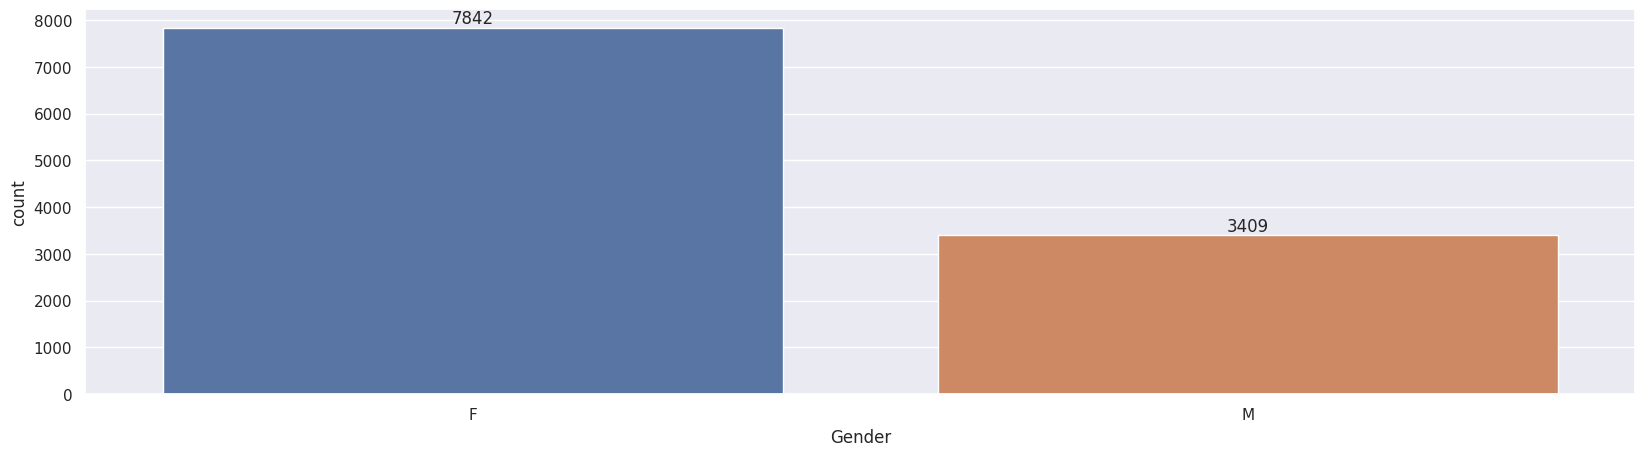

In [88]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

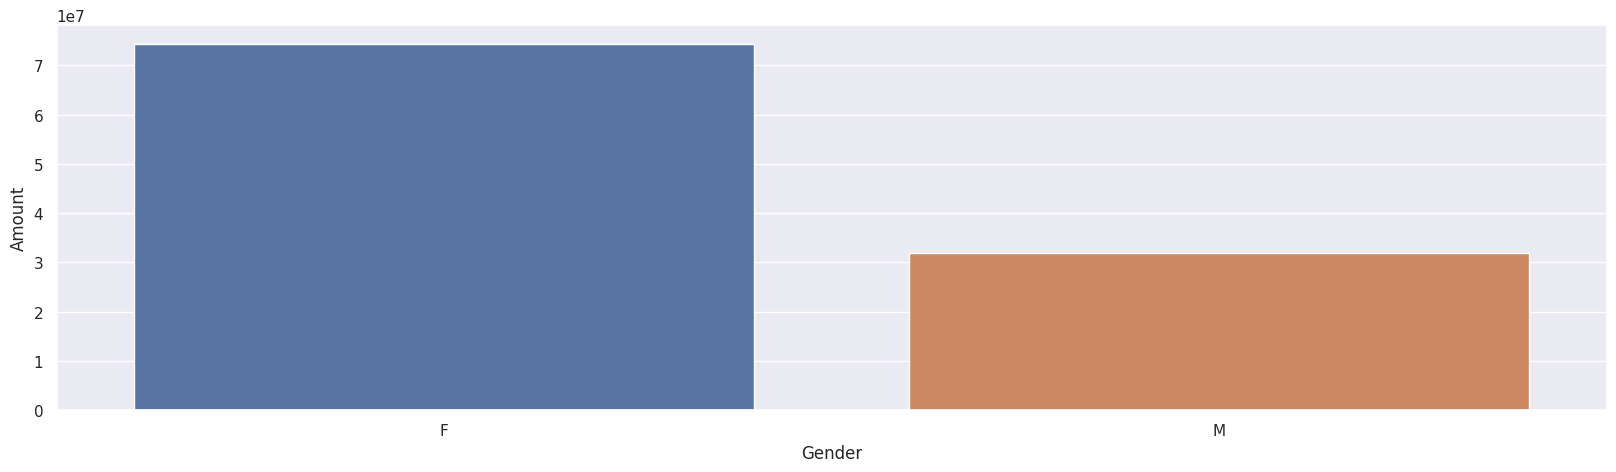

In [89]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)\
            ['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

### *From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age

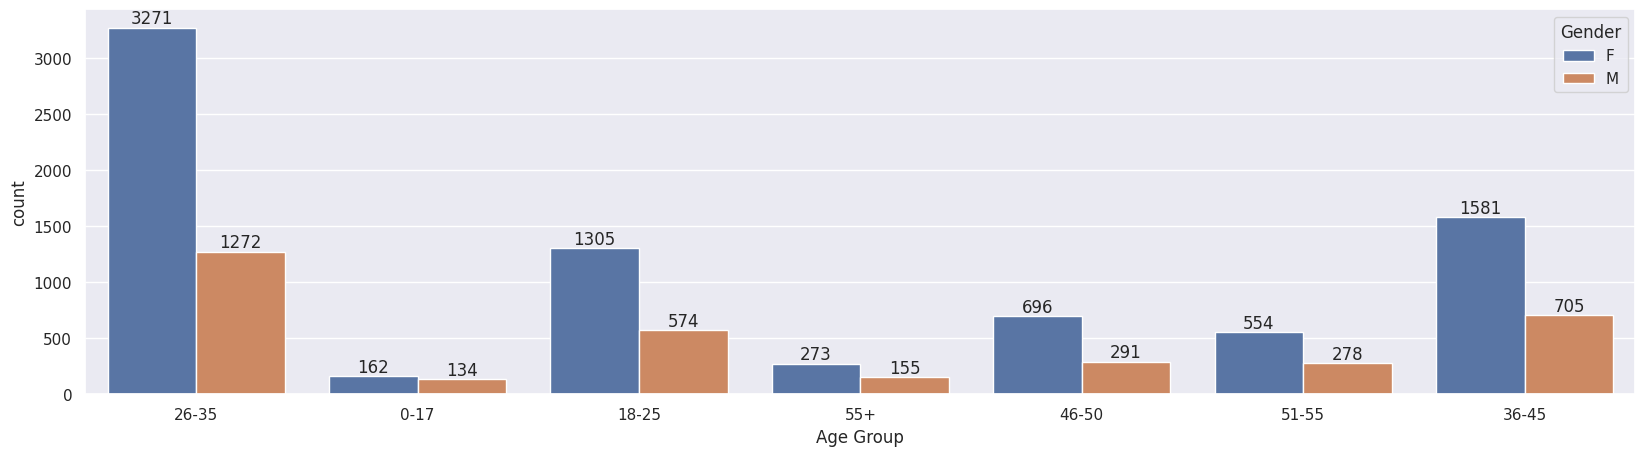

In [90]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

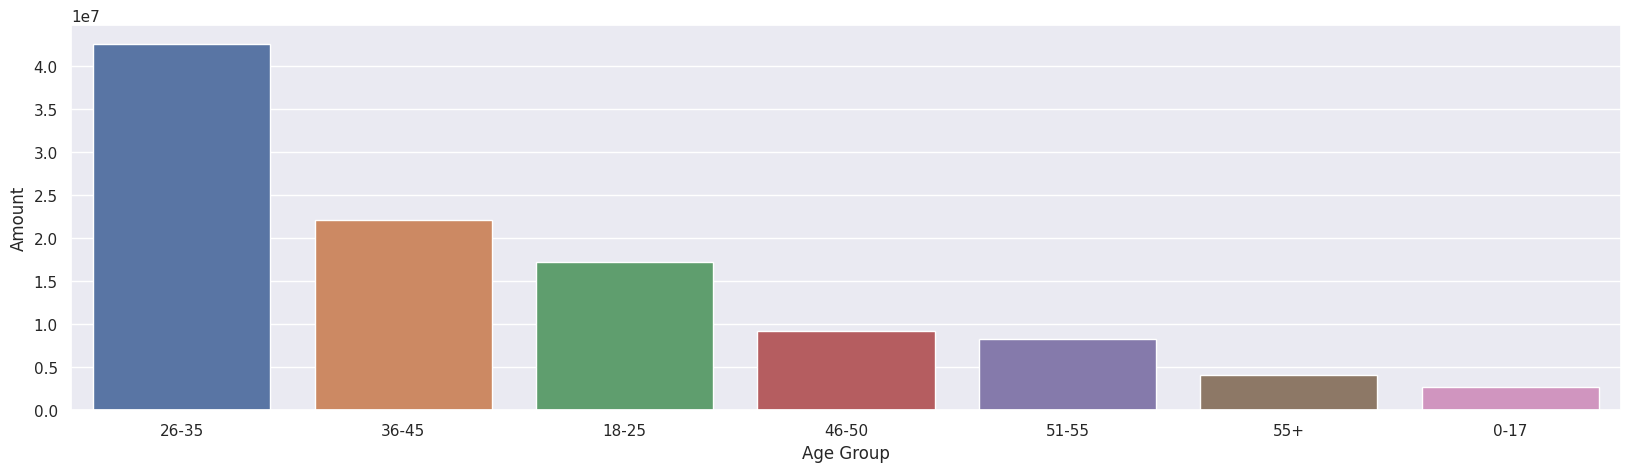

In [91]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)\
                ['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

### *From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# District

<Axes: xlabel='District', ylabel='Orders'>

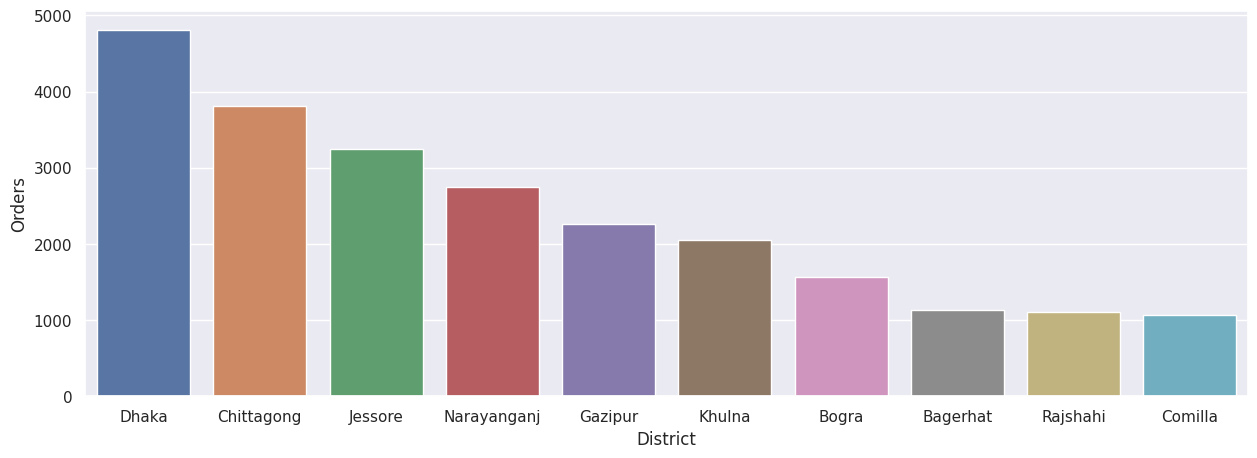

In [92]:
# total number of orders from top 10 District

sales_state = df.groupby(['District'], as_index=False)\
              ['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'District',y= 'Orders')

<Axes: xlabel='District', ylabel='Amount'>

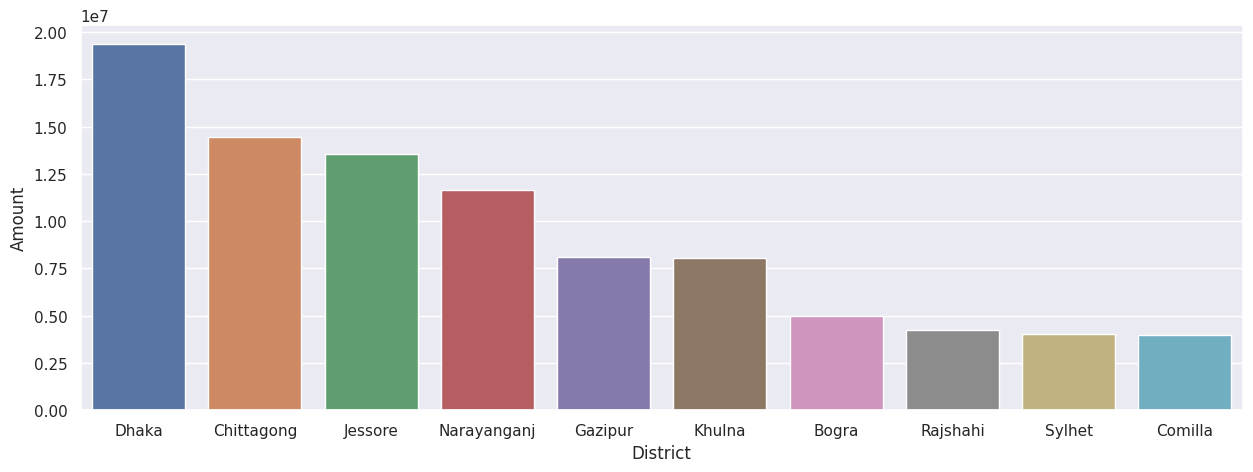

In [93]:
# total amount/sales from top 10 District

sales_district = df.groupby(['District'], as_index=False)\
                  ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_district, x = 'District',y= 'Amount')

### *From above graphs we can see that most of the orders & total sales/amount are from Dhaka, Chittagong and Jessore respectively*


# Marital Status

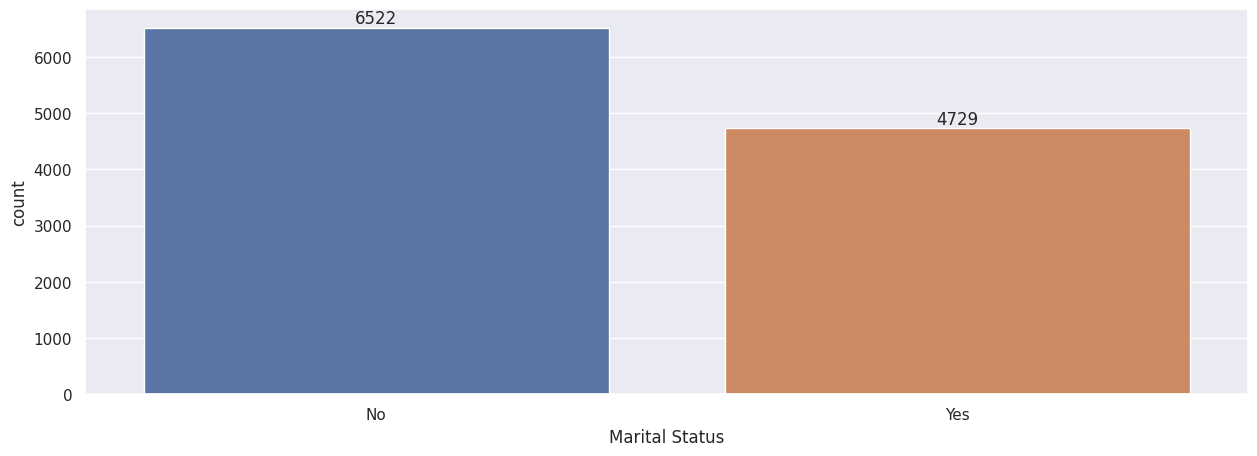

In [94]:
ax = sns.countplot(data = df, x = 'Marital Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital Status', ylabel='Amount'>

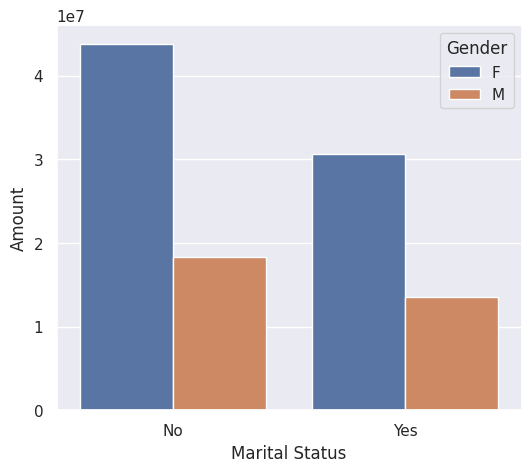

In [95]:
sales_state = df.groupby(['Marital Status', 'Gender'], as_index=False)\
                ['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital Status',y= 'Amount', hue='Gender')

### *From above graphs we can see that most of the buyers are not married (women) and they have high purchasing power*

# Occupation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'IT Sector'),
  Text(7, 0, 'Media'),
  Text(8, 0, 'Banking'),
  Text(9, 0, 'Retail'),
  Text(10, 0, 'Hospitality'),
  Text(11, 0, 'Aviation'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

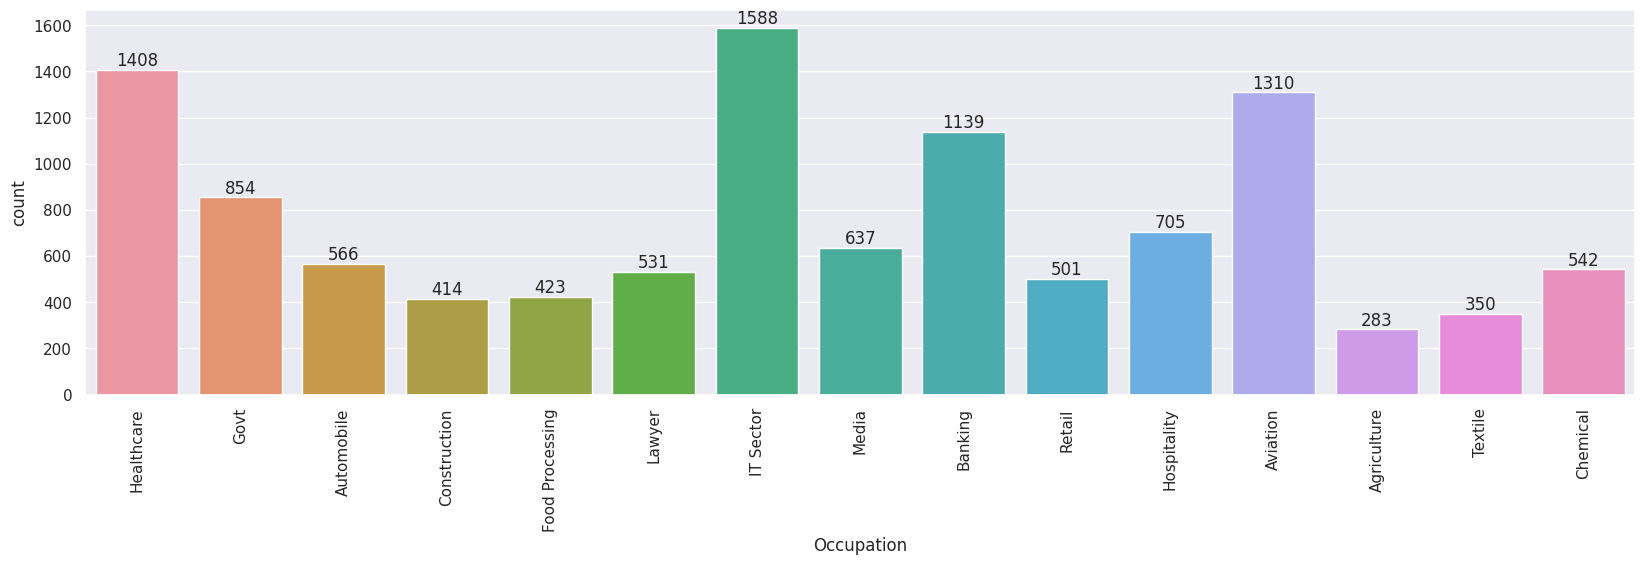

In [96]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

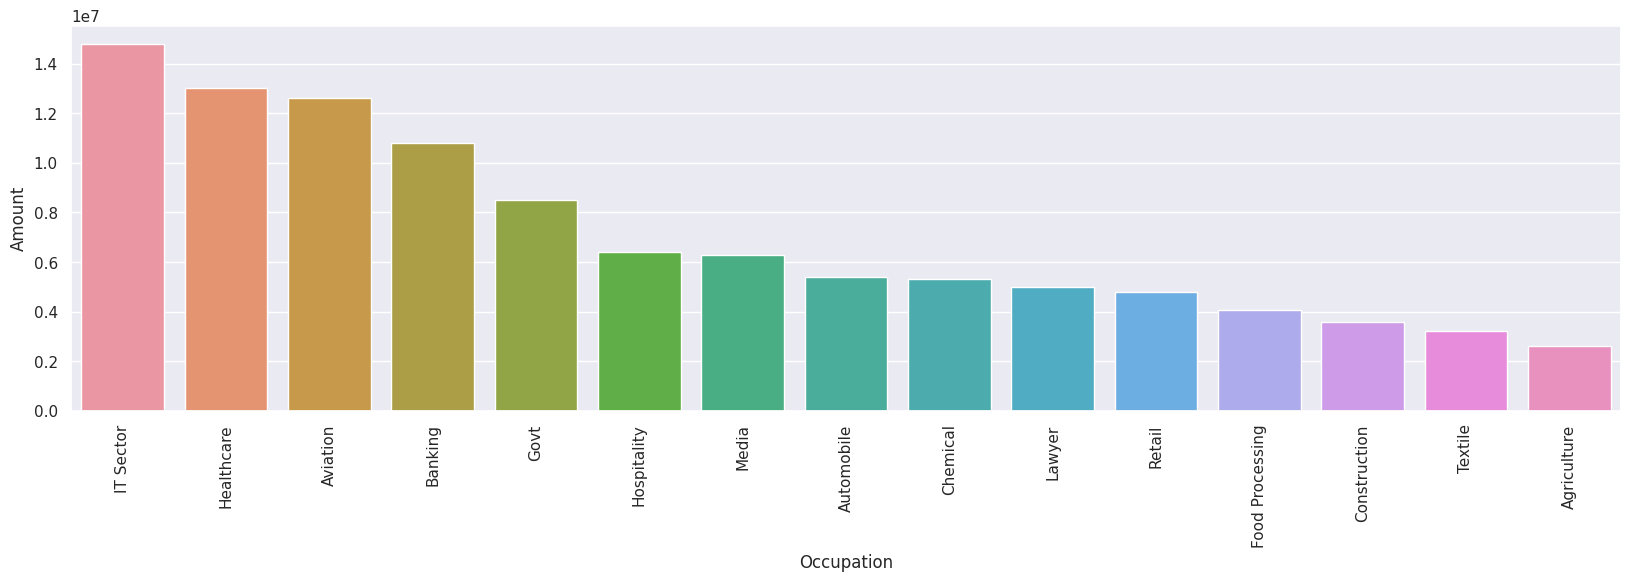

In [97]:
sales_state = df.groupby(['Occupation'], as_index=False)\
              ['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.xticks(rotation=90)

### *From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

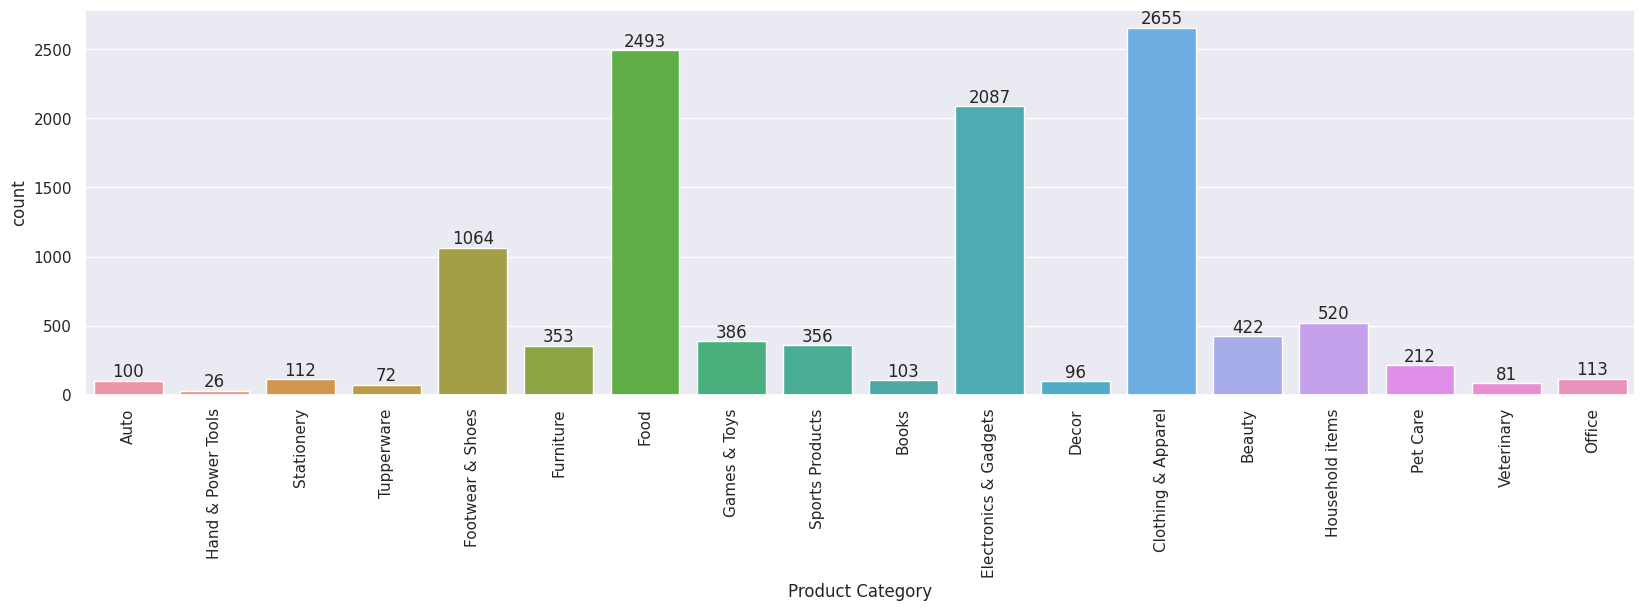

In [98]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Auto'),
  Text(8, 0, 'Beauty'),
  Text(9, 0, 'Stationery')])

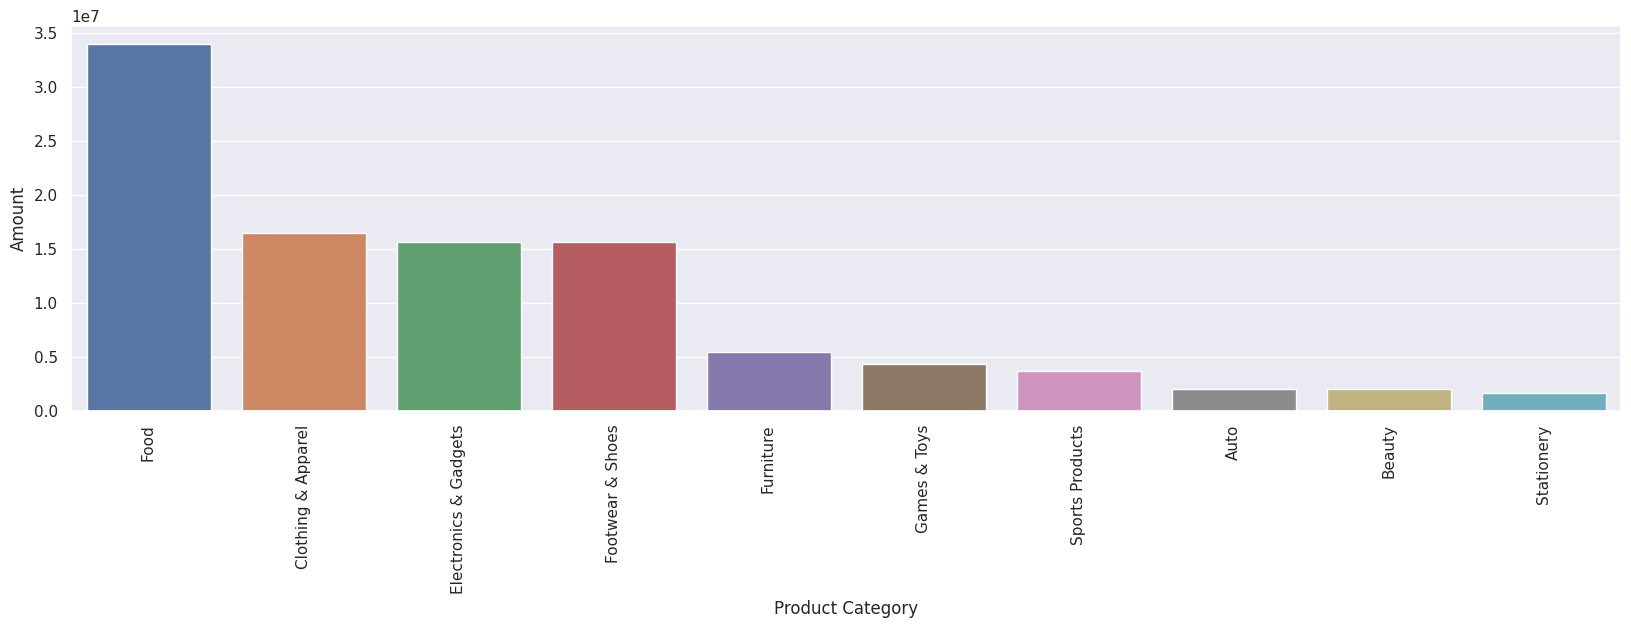

In [99]:
sales_state = df.groupby(['Product Category'], as_index=False)\
              ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product Category',y= 'Amount')
plt.xticks(rotation=90)

### *From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

# Conclusion:



### *Unmarried women of age group 26-35 yrs from Dhaka, Chittagong and Jessore working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*

### **Thank you.**